# CART- Classification and Regression Tree  (Breiman 1984)
* Amaç veri seti içerisinde ki karmaşık yapıları basit karar yapılarına dönüştürmektir.
* Heterojen veri setleri belirlenmiş bir hedefe değişkene göre homojen alt guruplara ayrılır.
* diğer yöntemlere kıysasla karar ağaçları daha kolay anlaışılr
* aşırı öğrenmeye eğilimli bir algoritmadır.
* karar ağaçlarının temelini oluşturur.
--------------
* Ağacın dallandırma işlemleri, saflık ölçümleri yaparak icra edilir. ! 

CART Model ve tahmin

gerekli küt:

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler ## standartlaStırma
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

 ##### Model ve tahmin

In [41]:
df = pd.read_csv('Hitters.csv')
df = df.dropna()
y= df['Salary']
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']]) ## one hot encoding
X_= df.drop(['Salary', 'League', 'Division','NewLeague'], axis =1).astype('float64')
X= pd.concat([X_,dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [70]:
X_train = pd.DataFrame(X_train['Hits'])
X_test = pd.DataFrame(X_test['Hits'])

In [43]:
cart_model = DecisionTreeRegressor()

In [44]:
?cart_model

Type:        DecisionTreeRegressor
String form: DecisionTreeRegressor()
File:        c:\users\ycanf\anaconda3\lib\site-packages\sklearn\tree\_classes.py
Docstring:  
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
    The function to measure the quality of a split. Supported criteria
    are "squared_error" for the mean squared error, which is equal to
    variance reduction as feature selection criterion and minimizes the L2
    loss using the mean of each terminal node, "friedman_mse", which uses
    mean squared error with Friedman's improvement score for potential
    splits, "absolute_error" for the mean absolute error, which minimizes
    the L1 loss using the median of each terminal node, and "poisson" which
    uses reduction in Poisson deviance to find splits.

    .. versionadded:: 0.18
       Mean Absolute Error (MAE) c

In [45]:
cart_model.fit(X_train,y_train)

DecisionTreeRegressor()

C:\Users\ycanf\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Salary')

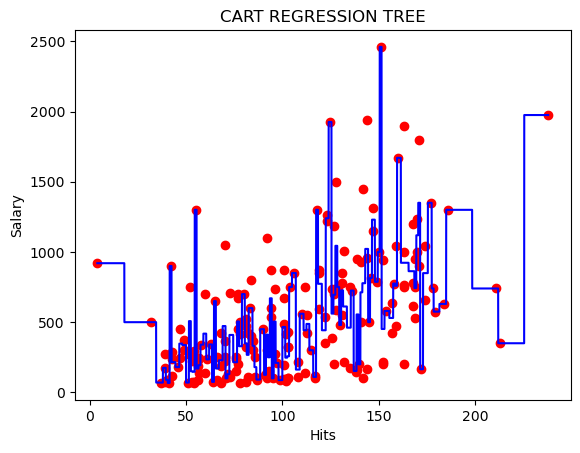

In [46]:
X_grid = np.arange(min(np.array(X_train)), max(np.array(X_train)), 0.01)
X_grid = X_grid.reshape((len(X_grid),1))

plt.scatter(X_train,y_train, color = 'red')
plt.plot(X_grid, cart_model.predict(X_grid), color='blue')

plt.title('CART REGRESSION TREE')
plt.xlabel('Hits')
plt.ylabel('Salary')

###### tek değişkenli tahmin

In [47]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

468.49579052913884

##### tüm degiseklerle tahmin

In [84]:
df = pd.read_csv('Hitters.csv')
df = df.dropna()
y= df['Salary']
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']]) ## one hot encoding
X_= df.drop(['Salary', 'League', 'Division','NewLeague'], axis =1).astype('float64')
X= pd.concat([X_,dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [61]:
cart_model = DecisionTreeRegressor().fit(X_train,y_train)

In [62]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

474.5259109777916

#### Tune

In [67]:
?DecisionTreeRegressor

Init signature:
DecisionTreeRegressor(
    *,
    criterion='squared_error',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    ccp_alpha=0.0,
)
Docstring:     
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
    The function to measure the quality of a split. Supported criteria
    are "squared_error" for the mean squared error, which is equal to
    variance reduction as feature selection criterion and minimizes the L2
    loss using the mean of each terminal node, "friedman_mse", which uses
    mean squared error with Friedman's improvement score for potential
    splits, "absolute_error" for the mean absolute error, which minimizes
    the L1 loss usi

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.

* Ağaca dayalı yöntemlerle beraber bizim için (aşırı öğrenmeyi engellemek için) bazı önemli paramtreler olacak, min_samples_split min_samples_split min_samples_leaf gibi
* genelenebilrilik kaygısı olmayan, mevcut durumu ifade etmek için makine öğremesi algoritması kullanmak istediğimiz durumlarda en başarılı Ml algoritmalarından birisidir.

In [77]:
cart_model = DecisionTreeRegressor(max_depth=2).fit(X_train,y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

430.81036420947464

In [78]:
cart_params= {'max_depth' : [2,3,4,5,10,20],
             'min_samples_split' : [2,10,5,30,50,100]}

In [85]:
cart_model = DecisionTreeRegressor()

In [86]:
cart_cv_model = GridSearchCV(cart_model,cart_params,cv =10).fit(X_train,y_train)

In [87]:
cart_cv_model.best_estimator_

DecisionTreeRegressor(max_depth=5, min_samples_split=50)

#final modeli

In [98]:
cart_model_tuned = DecisionTreeRegressor(max_depth=5, min_samples_split=50).fit(X_train,y_train)

In [99]:
y_pred = cart_model_tuned.predict(X_test)

In [100]:
np.sqrt(mean_squared_error(y_test,y_pred))

361.0876906511434